In [42]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# データセット
import seaborn as sns
sns.set(style="ticks")
df = sns.load_dataset("iris")
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [43]:
from sklearn import datasets, model_selection, svm, metrics
iris = datasets.load_iris()

print(type(iris))
print(iris.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [44]:
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(iris_data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [45]:
iris_label = pd.Series(data=iris.target)
print(iris_label.head())

0    0
1    0
2    0
3    0
4    0
dtype: int32


In [46]:
print(len(iris_data))

150


In [47]:
data_train, data_test, label_train, label_test = model_selection.train_test_split(iris_data, iris_label)
print(data_train.head())

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
65                6.7               3.1                4.4               1.4
76                6.8               2.8                4.8               1.4
24                4.8               3.4                1.9               0.2
35                5.0               3.2                1.2               0.2
13                4.3               3.0                1.1               0.1


In [48]:
print(label_train.head())

65    1
76    1
24    0
35    0
13    0
dtype: int32


In [49]:
print(len(data_train), len(data_test))

112 38


In [50]:
clf = svm.SVC()
clf.fit(data_train, label_train)
pre = clf.predict(data_test)

print(type(pre))
print(np.array(label_test))
print(pre)

<class 'numpy.ndarray'>
[2 2 0 2 2 0 0 2 2 2 0 1 1 0 2 1 1 1 0 2 2 0 0 2 1 1 1 1 2 1 2 1 1 2 2 1 1
 0]
[2 2 0 2 2 0 0 2 2 2 0 1 1 0 2 1 1 1 0 2 2 0 0 2 1 2 1 2 2 1 2 1 1 2 2 2 1
 0]


In [51]:
ac_score = metrics.accuracy_score(label_test, pre)
print(ac_score)

0.9210526315789473


In [52]:
# 混合行列を生成
from sklearn.metrics import confusion_matrix
print(confusion_matrix(np.array(label_test), pre, labels=[0, 1, 2]))

[[ 9  0  0]
 [ 0 11  3]
 [ 0  0 15]]


In [53]:
# 正解率 - accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(np.array(label_test), pre))
print(np.sum(pre == 0))

0.9210526315789473
9


In [54]:
# 再現率 - recall
# true positive rate
from sklearn.metrics import recall_score
rec_score = recall_score(np.array(label_test), pre, average=None)
print(rec_score)

[1.         0.78571429 1.        ]


In [55]:
# 適合率 - presition
# positive predictive value
from sklearn.metrics import precision_score
pre_score = precision_score(np.array(label_test), pre, average=None)
print(pre_score)

[1.         1.         0.83333333]


In [56]:
# F1値 - F1-measure
#適合率と再現率の調和平均
from sklearn.metrics import f1_score
f_score = f1_score(np.array(label_test), pre, average=None)
print(f_score)

[1.         0.88       0.90909091]


In [57]:
# ヒートマップの可視化
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

# 分別ラベル
print(iris.target_names)

def plot_confusion_matrix(test_y, pred_y, class_names, normalize=False):
    cm = confusion_matrix(test_y, pred_y)
    classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes,
           yticklabels=classes,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha="center", va="center")
    fig.tight_layout()
    return ax

['setosa' 'versicolor' 'virginica']


<AxesSubplot:xlabel='\nPredicted label', ylabel='True label\n'>

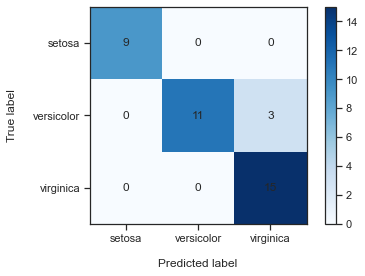

In [58]:
plot_confusion_matrix(np.array(label_test), pre, iris.target_names)